In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from PIL import Image

In [3]:
df=pd.read_csv("Tweetdataset.csv")
df.shape

(10000, 6)

In [4]:
df1=df.head()
df2=df.info()
df3=df.describe()
df4=df.isnull().sum()
df5=df.duplicated().sum()
print(df1,df2,df3,df4,df5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet_ID   10000 non-null  int64 
 1   Username   10000 non-null  object
 2   Text       10000 non-null  object
 3   Retweets   10000 non-null  int64 
 4   Likes      10000 non-null  int64 
 5   Timestamp  10000 non-null  object
dtypes: int64(3), object(3)
memory usage: 468.9+ KB
   Tweet_ID        Username  \
0         1         julie81   
1         2   richardhester   
2         3  williamsjoseph   
3         4     danielsmary   
4         5      carlwarren   

                                                Text  Retweets  Likes  \
0  Party least receive say or single. Prevent pre...         2     25   
1  Hotel still Congress may member staff. Media d...        35     29   
2  Nice be her debate industry that year. Film wh...        51     25   
3  Laugh explain situation career occur serious. .

In [5]:
df['Text'] = df['Text'].str.replace('[^a-zA-Z0-9\s]', '')
df['Text'] = df['Text'].str.replace('http\S+|www.\S+', '', case=False)

In [6]:
# summary statistics
retweets_mean = df['Retweets'].mean()
likes_median = df['Likes'].median()
corr = df['Retweets'].corr(df['Likes'])

In [7]:
# sentiment analysis on tweet text
df['sentiment_polarity'] = df['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [8]:
# Print results
print("Mean Retweets:", retweets_mean)
print("Median Likes:", likes_median)
print("Correlation between Retweets and Likes:", corr)

Mean Retweets: 49.7212
Median Likes: 50.0
Correlation between Retweets and Likes: 0.012797546201034798


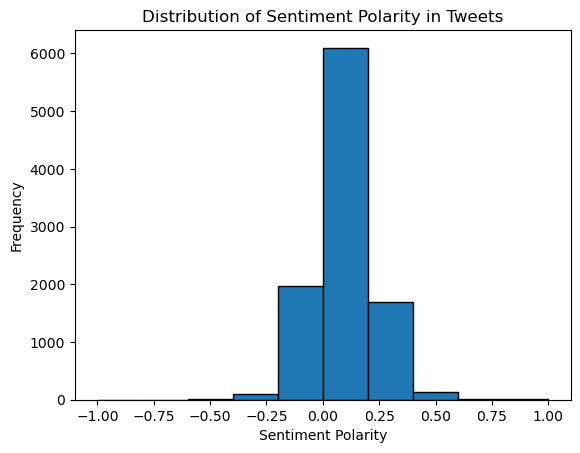

In [9]:
plt.hist(df['sentiment_polarity'], bins=10, range=(-1, 1), edgecolor='black')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Polarity in Tweets')
plt.show()

In [10]:
# Print the number of rows and columns in the dataset
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])

#  the average values of retweets and likes
retweets_avg = df['Retweets'].mean()
likes_avg = df['Likes'].mean()
print("Average Retweets:", retweets_avg)
print("Average Likes:", likes_avg)

Number of Rows: 10000
Number of Columns: 7
Average Retweets: 49.7212
Average Likes: 49.9293


In [11]:
#  the top users with the highest number of retweets
top_users_tweets = df.groupby('Username')['Retweets'].sum().nlargest(10)
print("Top Users by Retweets:")
print(top_users_tweets)

Top Users by Retweets:
Username
pjohnson           362
awilliams          306
fsmith             301
wmitchell          269
nbrown             267
davidsmith         263
christopher64      261
amiller            253
ehernandez         251
jessicawilliams    251
Name: Retweets, dtype: int64


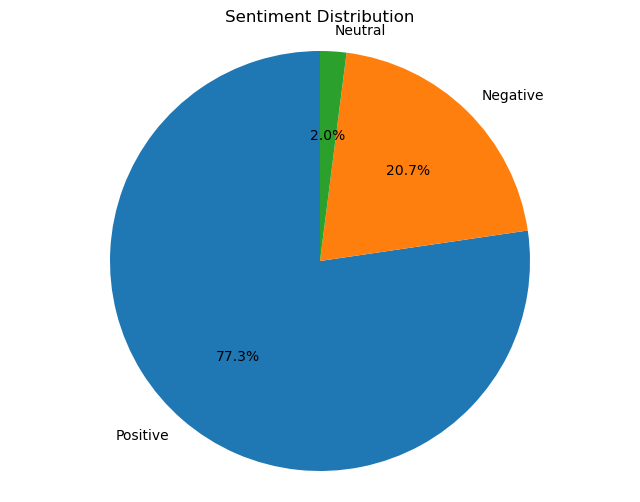

In [16]:
# sentiment analysis on tweet text
df['Sentiment'] = df['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Categorize sentiment into positive, negative, and neutral
df['Sentiment Category'] = df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

# the count of each sentiment category
sentimental_counts = df['Sentiment Category'].value_counts()

#  pie chart of sentiment distribution
plt.figure(figsize=(8, 6))
plt.pie(sentimental_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Sentiment Distribution')
plt.show()


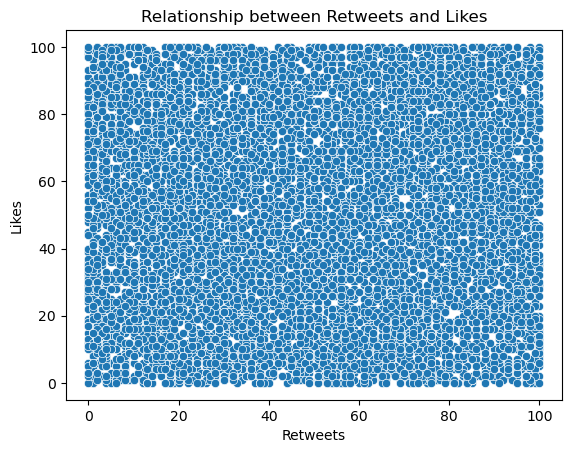

In [17]:
# Plot the relationship between retweets and likes
sns.scatterplot(x='Retweets', y='Likes', data=df)
plt.xlabel('Retweets')
plt.ylabel('Likes')
plt.title('Relationship between Retweets and Likes')
plt.show()

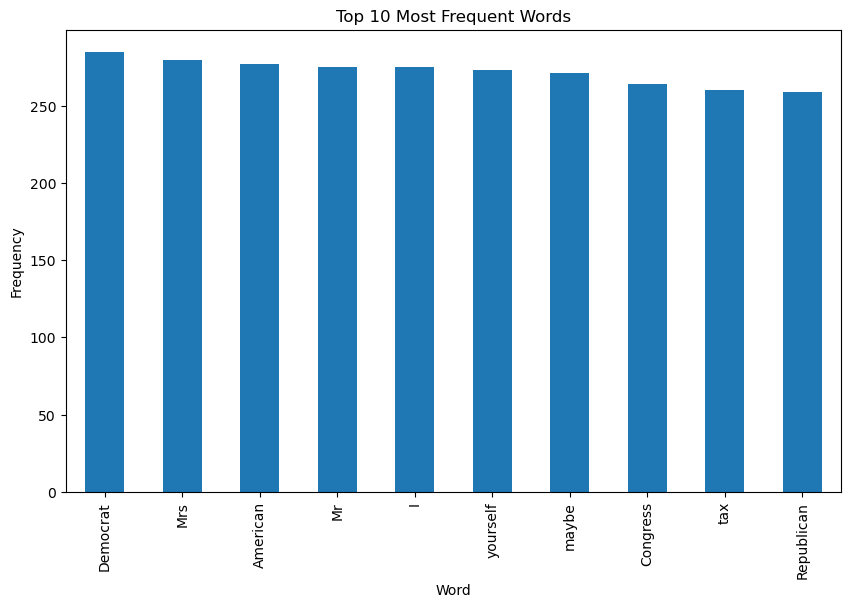

In [18]:
# Combine all tweet texts into a single string
all_text = ' '.join(df['Text'])

# Split the text into individual words
words = all_text.split()

# the frequency of each word
word_counts = pd.Series(words).value_counts().sort_values(ascending=False)

# the top 10 most frequent words
plt.figure(figsize=(10, 6))
word_counts.head(10).plot(kind='bar')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words')
plt.show()
